# Feature Map - SHAP

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Imports

In [12]:
# imports
from matplotlib import pyplot as plt
import numpy as np

import os

from qiskit import transpile

# import data class
from utilities.dataset_utils import DiabetesData

from qiskit.circuit.library import real_amplitudes
from qiskit.circuit.library import efficient_su2

# qiskit imports
# simulator
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as Sampler

In [13]:
np.random.seed(42)  # for reproducibility

In [14]:
# path to diabetes.csv
path = os.path.join(os.getcwd(), '..', 'utilities', 'diabetes.csv')
# load dataset class
dataset = DiabetesData(path)

In [15]:
# list of feature names
feature_names = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age"
]

In [16]:
# get data
X_train, X_test, y_train, y_test = dataset.preprocess_data_ranged()

In [17]:
# setup backend simulator
backend = AerSimulator()
backend.set_options(max_parallel_threads=os.cpu_count(), method='statevector')

In [18]:
# sampler
sampler = Sampler.from_backend(backend)

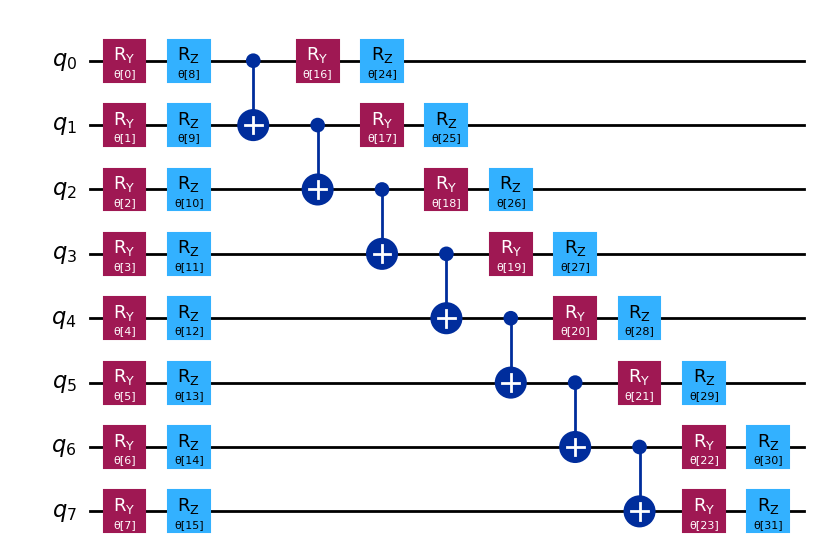

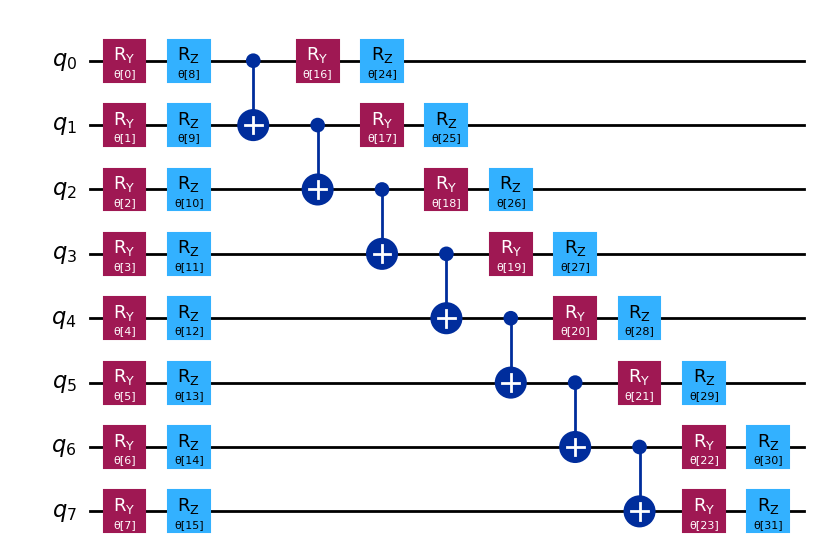

In [24]:
efficient_su2(num_qubits=dataset.get_num_features(), reps=1, entanglement='linear').draw('mpl')

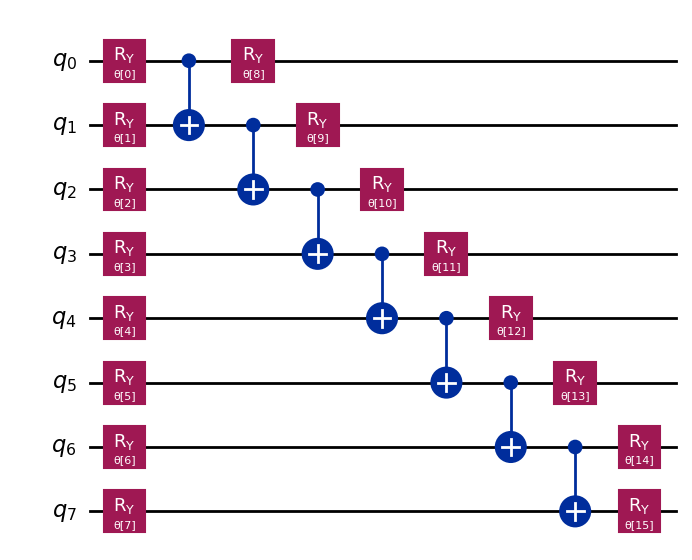

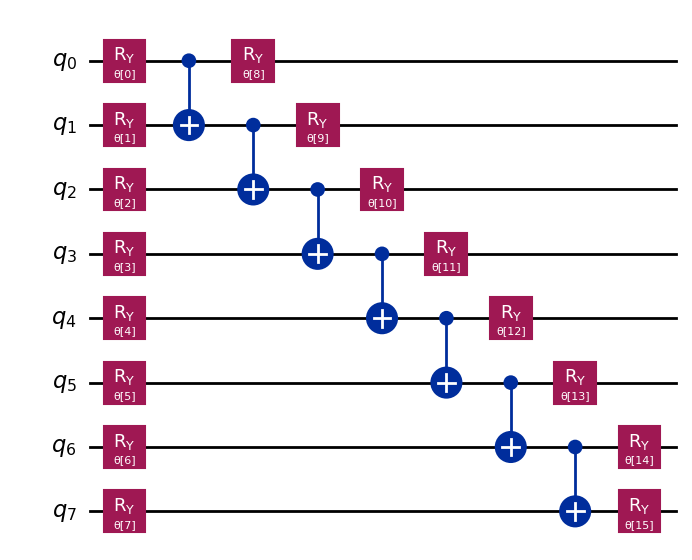

In [20]:
real_amplitudes(num_qubits=dataset.get_num_features(), reps=1, entanglement='linear').draw('mpl')